(bayes-workflow-notebook)=
# Modellazione Bayesiana

L'obiettivo di questo Capitolo è di introdurre il quadro concettuale dela modellizzazione bayesiana.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import uniform

%config InlineBackend.figure_format = 'retina'
%load_ext watermark

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

## Comprendere i fondamenti

Iniziamo esaminando la definizione precisa di un modello e il suo fondamentale scopo. La modellizzazione emerge come uno strumento essenziale per affrontare la complessità dei sistemi, permettendoci di scomporli in concetti chiave che facilitano la comprensione, l'acquisizione di conoscenza e persino la simulazione dei processi o degli oggetti d'interesse. L'elaborazione di un modello richiede una sinergia articolata di competenze disciplinari e abilità statistiche avanzate. Tale processo si sviluppa attraverso una sequenza di fasi che traducono i fondamenti teorici e le osservazioni empiriche in obiettivi computazionali definiti in maniera chiara. In questo contesto, i dati rivestono il ruolo primario di input, mentre le distribuzioni statistiche agiscono come strumenti matematici fondamentali per formalizzare in modo preciso il modello statistico stesso. Questi strumenti consentono di rappresentare con precisione le interrelazioni tra le variabili coinvolte nel modello e di quantificare l'incertezza associata ai risultati ottenuti.

Passando alle particolarità dei modelli bayesiani, troviamo due aspetti chiave che li caratterizzano:

1. **Descrizione delle quantità sconosciute**: Le grandezze che non sono note vengono modellate mediante l'uso di distribuzioni di probabilità, le quali vengono identificate come i parametri del modello.

2. **Teorema di Bayes per l'aggiornamento**: Il teorema di Bayes viene impiegato per aggiornare i valori dei parametri, tenendo conto dei dati osservati. Questo processo può essere interpretato come una riallocazione delle probabilità, in cui l'informazione raccolta dai dati influisce sull'incertezza associata ai parametri.

Il processo di costruzione di un modello bayesiano può essere articolato in tre passaggi fondamentali:

1. **Progettazione del Modello**: A partire dai dati e dalle ipotesi sul loro processo di generazione, si progetta un modello. Questo viene ottenuto tramite la combinazione e la trasformazione di variabili casuali.

2. **Inferenza Bayesiana**: Utilizzando il teorema di Bayes, si adatta il modello ai dati disponibili, ottenendo così una distribuzione a posteriori. Tale processo, chiamato inferenza, mira a ridurre l'incertezza sui possibili valori dei parametri in seguito all'osservazione dei dati.

3. **Valutazione e Confronto**: Si valuta la validità del modello, verificandone la coerenza rispetto a diversi criteri, inclusi i dati osservati e l'esperienza nel dominio di riferimento. Poiché l'incertezza sui modelli stessi è spesso presente, è consueto confrontare più modelli per giungere a una scelta informata.

In questa sezione della dispensa, esploreremo dettagliatamente ciascuno di questi tre passaggi.

## L'inferenza Bayesiana: dal teorema di Bayes alla distribuzione a posteriori

L'inferenza, in termini più ampi, si configura come il processo di derivazione di conclusioni basate sulla valutazione di evidenze e ragionamenti. Nel contesto statistico, l'inferenza bayesiana rappresenta una forma specifica di inferenza che si basa sulla combinazione di distribuzioni di probabilità al fine di derivare ulteriori distribuzioni di probabilità. Il teorema di Bayes costituisce il fondamento di tale approccio, fornendo una metodologia generale per la stima del valore di un parametro $\theta$ sulla base dei dati osservati $Y$:

$$
\underbrace{p(\theta \mid Y)}_{\text{posteriore}} = \frac{\overbrace{p(Y \mid \theta)}^{\text{verosimiglianza}}\; \overbrace{p(\theta)}^{\text{prior}}}{\underbrace{{p(Y)}}_{\text{verosimiglianza marginale}}}.
$$

La funzione di verosimiglianza stabilisce il legame tra i dati osservati e i parametri sconosciuti, mentre la distribuzione a priori rappresenta l'incertezza preesistente sui parametri prima di effettuare le osservazioni. La moltiplicazione di queste due componenti conduce alla distribuzione a posteriori, la quale riflette la distribuzione congiunta di tutti i parametri del modello (condizionata ai dati osservati). Il processo che guida la trasformazione dalla distribuzione a priori a quella a posteriori è comunemente identificato come *aggiornamento bayesiano*.

## L'aggiornamento bayesiano

Per offrire una spiegazione quantitativa del procedimento di aggiornamento bayesiano, prendiamo in considerazione un esempio pratico: la localizzazione di un aeromobile disperso. In questo capitolo, ci concentriamo esclusivamente sulla comprensione della struttura logica del problema e sulla sua formalizzazione tramite l'impiego di distribuzioni di probabilità. In questa fase, tralasciamo i dettagli implementativi e mettiamo invece l'accento sul significato delle diverse fasi e degli obiettivi del processo di aggiornamento bayesiano. Successivamente, esamineremo le metodologie per conseguire tali obiettivi, approfondendo gli aspetti di natura computazionale.

L'illustrazione coinvolge un ipotetico scenario in cui un aereo è disperso nell'Oceano Pacifico. Ci troviamo in un contesto in cui la latitudine è determinata, ma la longitudine rimane ignota (disponiamo unicamente dell'indicazione della direzione del viaggio, senza conoscere la distanza percorsa). L'obiettivo principale è rifinire la stima della posizione approssimata ($\theta$) dell'aereo. Per raggiungere questo fine, gli operatori di soccorso raccolgono dati dai frammenti dei detriti che sono stati individuati.

Iniziamo il processo con una stima iniziale, definita come *distribuzione a priori*. Questa distribuzione di probabilità rappresenta il nostro grado di conoscenza sulla posizione dell'aereo prima di ricevere ulteriori dati o informazioni.

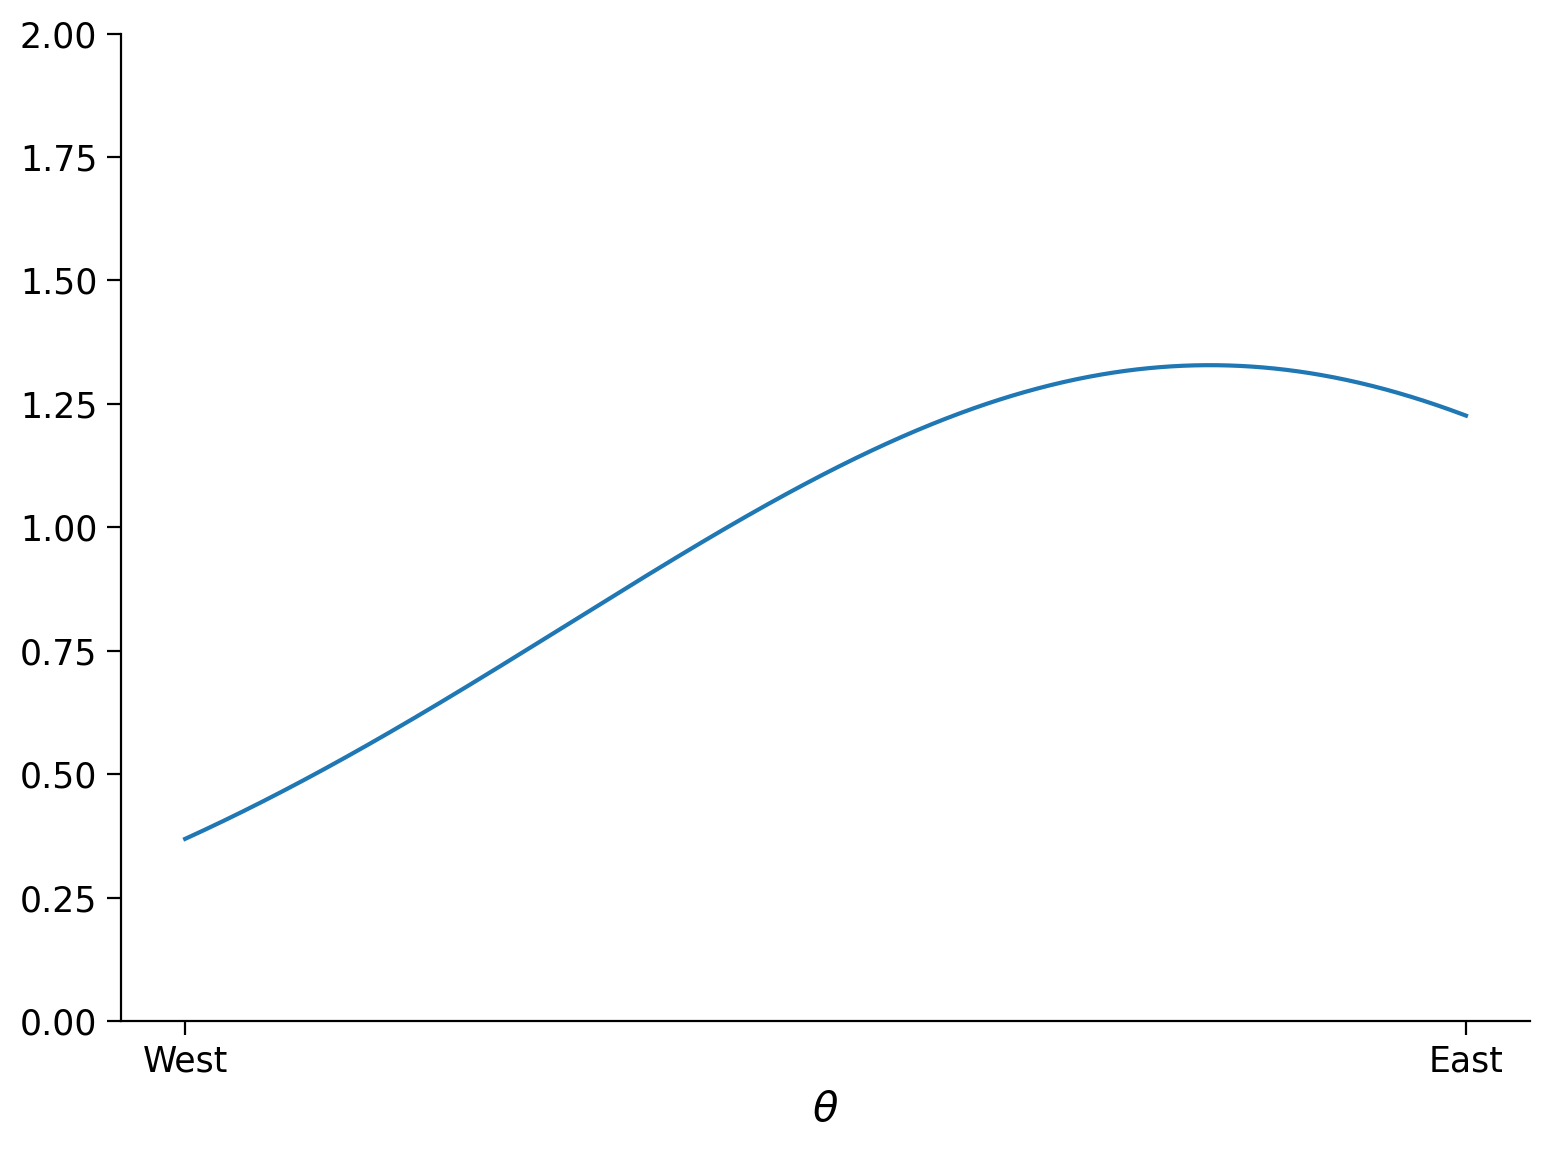

In [2]:
def dnorm_trunc(x, mean=0, sd=1, ll=0, ul=1):
    out = norm.pdf(x, mean, sd) / (norm.cdf(ul, mean, sd) - norm.cdf(ll, mean, sd))
    out[(x > ul) | (x < ll)] = 0
    return out

# Data points for x-axis
x_vals = np.linspace(0, 1, 1000)

# Parameters for the dnorm_trunc function
mean_val = 0.8
sd_val = 0.5

# Calculate the y values using dnorm_trunc function
y_vals = dnorm_trunc(x_vals, mean_val, sd_val)

# Plot the curve
plt.plot(x_vals, y_vals)
plt.ylim(0, 2)
plt.xlabel(r"$\theta$")
plt.ylabel("")
plt.xticks([0, 1], ["West", "East"])
plt.show()

Nel contesto bayesiano, una distribuzione di probabilità assume il compito di rappresentare l'incertezza o le convinzioni che nutriamo riguardo ai molteplici valori possibili che un parametro può assumere. Nel caso attuale, il parametro $\theta$ indica la longitudine associata alla posizione dell'aereo disperso nell'oceano Pacifico. La posizione esatta dell'aereo rimane sconosciuta. Tuttavia, formuliamo delle ipotesi iniziali sulle possibili localizzazioni. Per ogni valore possibile di $\theta$, la distribuzione di probabilità attribuisce un livello di fiducia che rispecchia quanto riteniamo probabile che quel valore specifico rappresenti il vero valore del parametro. I valori di $\theta$ associati a ordinate più elevate nella funzione indicano un grado superiore di fiducia, in quanto riteniamo che tali valori siano più propensi a rappresentare il vero valore del parametro. In contrasto, i valori di $\theta$ associati a ordinate più basse denotano convinzioni più deboli.

Sull'asse $x$ del grafico sopra riportato sono indicati i valori di $\theta$, cioè i diversi possibili valori della longitudine dell'aereo. Le estremità dell'asse delle ascisse sono etichettate come "West" (Ovest) e "East" (Est), per indicare che $\theta$ spazia da ovest a est. Lungo l'asse delle ordinate ($y$), sono tracciati i valori delle densità di probabilità associati a ciascun valore di $\theta$. 

Nel nostro caso specifico, la distribuzione a priori è centrata intorno a $\theta = 0.8$, suggerendo una previsione iniziale che l'aereo sia più verosimilmente situato ad est. Tuttavia, permangono incertezze considerevoli riguardo alla posizione esatta. Possiamo affermare, comunque, che inizialmente riteniamo che sia due volte più probabile che l'aereo si trovi ad est rispetto a ovest.

La scelta della distribuzione a priori rispecchia le convinzioni del ricercatore riguardo al problema in questione. Di conseguenza, diversi ricercatori potrebbero formulare diverse distribuzioni a priori per lo stesso problema, e tale diversità è accettabile, a patto che tali distribuzioni siano ragionevolmente giustificate. Nel prosieguo, scopriremo che nelle analisi Bayesiane, anche con campioni di dimensioni moderate, le varie distribuzioni a priori generano solitamente differenze trascurabili.

Ora, supponiamo di aver raccolto dei detriti nelle posizioni mostrate nel grafico seguente.

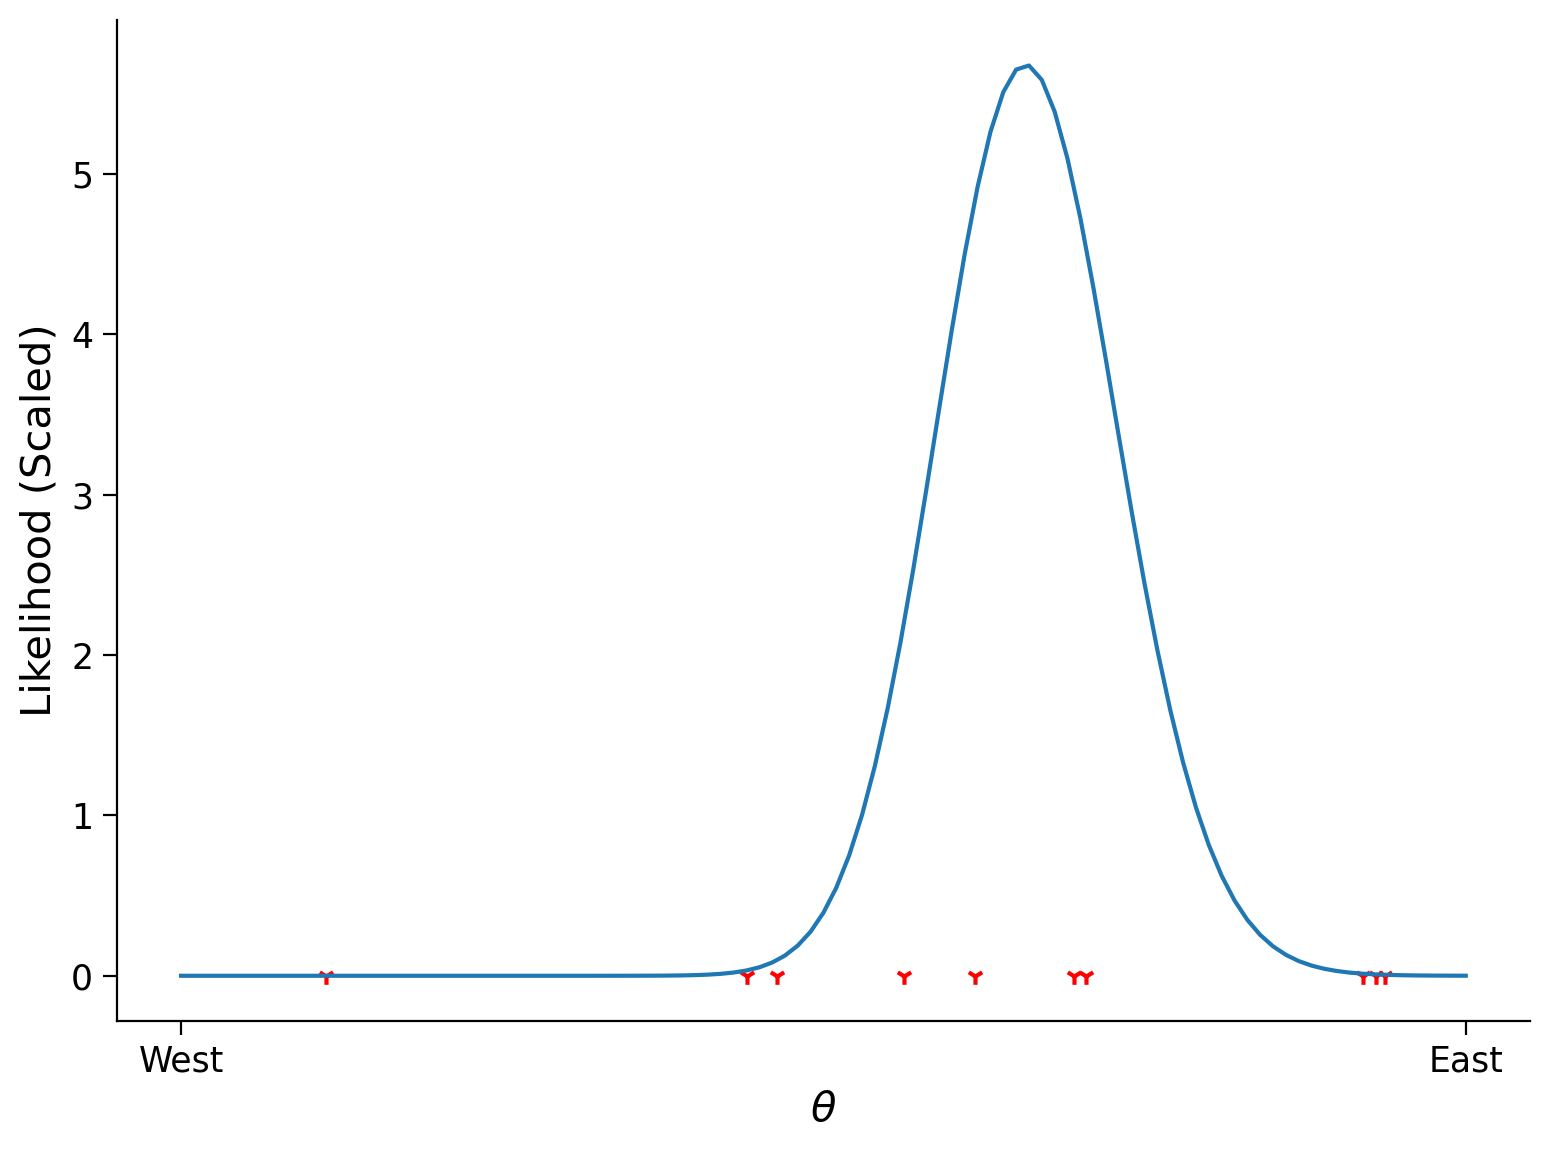

In [3]:
def qnorm_trunc(p, mean=0, sd=1, ll=0, ul=1):
    cdf_ll = norm.cdf(ll, loc=mean, scale=sd)
    cdf_ul = norm.cdf(ul, loc=mean, scale=sd)
    return norm.ppf(cdf_ll + p * (cdf_ul - cdf_ll), loc=mean, scale=sd)


def rnorm_trunc(n, mean=0, sd=1, ll=0, ul=1):
    p = np.random.uniform(size=n)
    return qnorm_trunc(p, mean=mean, sd=sd, ll=ll, ul=ul)


grid = np.linspace(0, 1, num=101)


def compute_lik(x, pts=grid, sd=0.2, binwidth=0.01):
    lik_vals = norm.pdf(x[:, np.newaxis], loc=pts, scale=sd) / (
        norm.cdf(1, loc=pts, scale=sd) - norm.cdf(0, loc=pts, scale=sd)
    )
    lik = np.prod(lik_vals, axis=0)
    return lik / np.sum(lik) / binwidth


np.random.seed(4)
dat_x = rnorm_trunc(10, mean=0.6, sd=0.2)
lik_x = compute_lik(dat_x)

plt.plot(grid, lik_x)
plt.scatter(dat_x, np.zeros_like(dat_x), color="red", marker="1")
plt.xlabel(r"$\theta$")
plt.ylabel("Likelihood (Scaled)")
plt.xticks([0, 1], ["West", "East"])
plt.show()

Dal Teorema di Bayes, è possibile derivare la distribuzione a posteriori attraverso il seguente procedimento:

$$
\text{Probabilità a posteriori} \propto \text{Probabilità a priori} \times
                                       \text{Verosimiglianza}.
$$

In altre parole, è sufficiente moltiplicare le probabilità a priori e la verosimiglianza al fine di ottenere la probabilità posteriore per ciascuna posizione. È importante garantire che l'area sotto la curva sia normalizzata a 1. Questo processo è conosciuto come *aggiornamento bayesiano*.

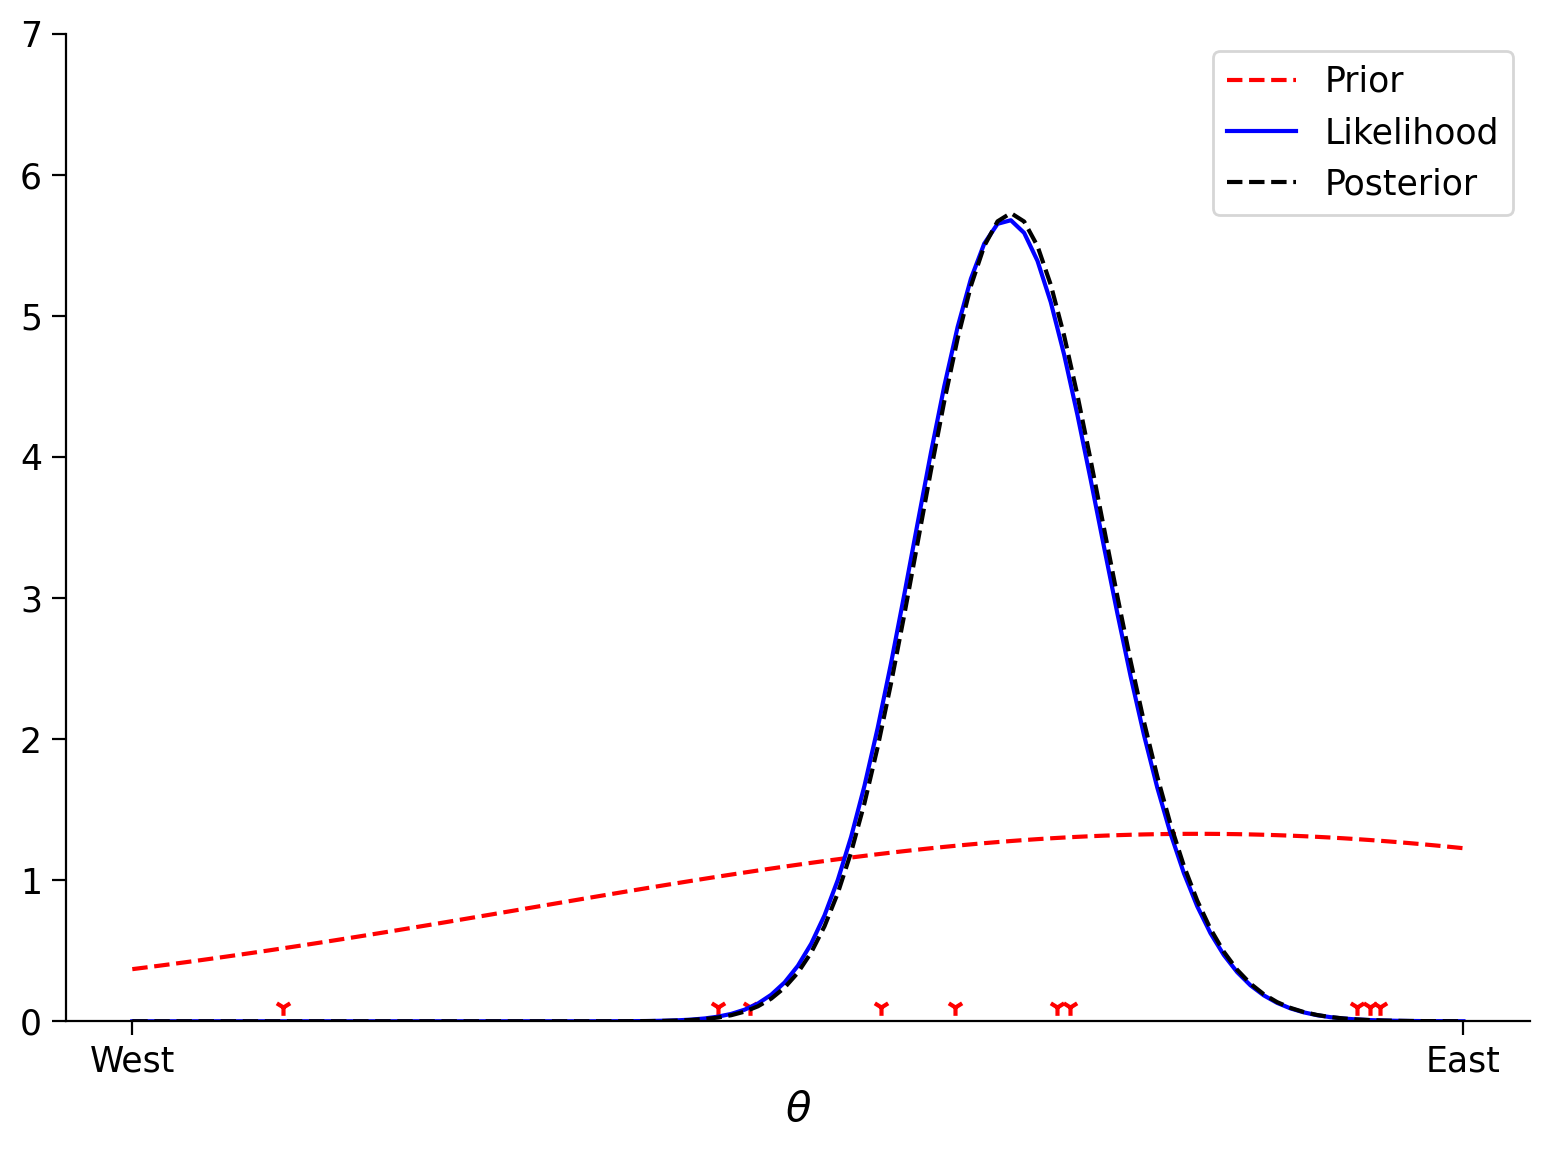

In [4]:
def update_probs(prior_probs, lik, binwidth=0.01):
    post_probs = prior_probs * lik
    return post_probs / np.sum(post_probs) / binwidth

grid = np.linspace(0, 1, num=101)

# Prior probabilities
prior_probs = dnorm_trunc(grid, mean=0.8, sd=0.5)

# Likelihood values
lik_x = compute_lik(dat_x)

# Posterior probabilities
posterior_probs = update_probs(prior_probs, lik_x)

# Plotting
plt.plot(grid, dnorm_trunc(grid, mean=0.8, sd=0.5), linestyle='dashed', color='red', label='Prior')
plt.plot(grid, lik_x, linestyle='solid', color='blue', label='Likelihood')
plt.plot(grid, posterior_probs, linestyle='dashed', color='black', label='Posterior')
plt.scatter(dat_x, np.zeros_like(dat_x)+.1, color='red', marker='1')
plt.ylim(0, 7)
plt.xlabel(r'$\theta$')
plt.ylabel('')
plt.xticks([0, 1], ["West", "East"])
plt.legend()
plt.show()

In questa situazione, è evidente che una distribuzione a priori come quella descritta in precedenza, che definiremo "debolmente informativa", ha un impatto trascurabile e la distribuzione a posteriori risulta quasi indistinguibile dalla verosimiglianza (che è stata normalizzata).

Ora, esamineremo come si comporta una distribuzione a priori maggiormente informativa.

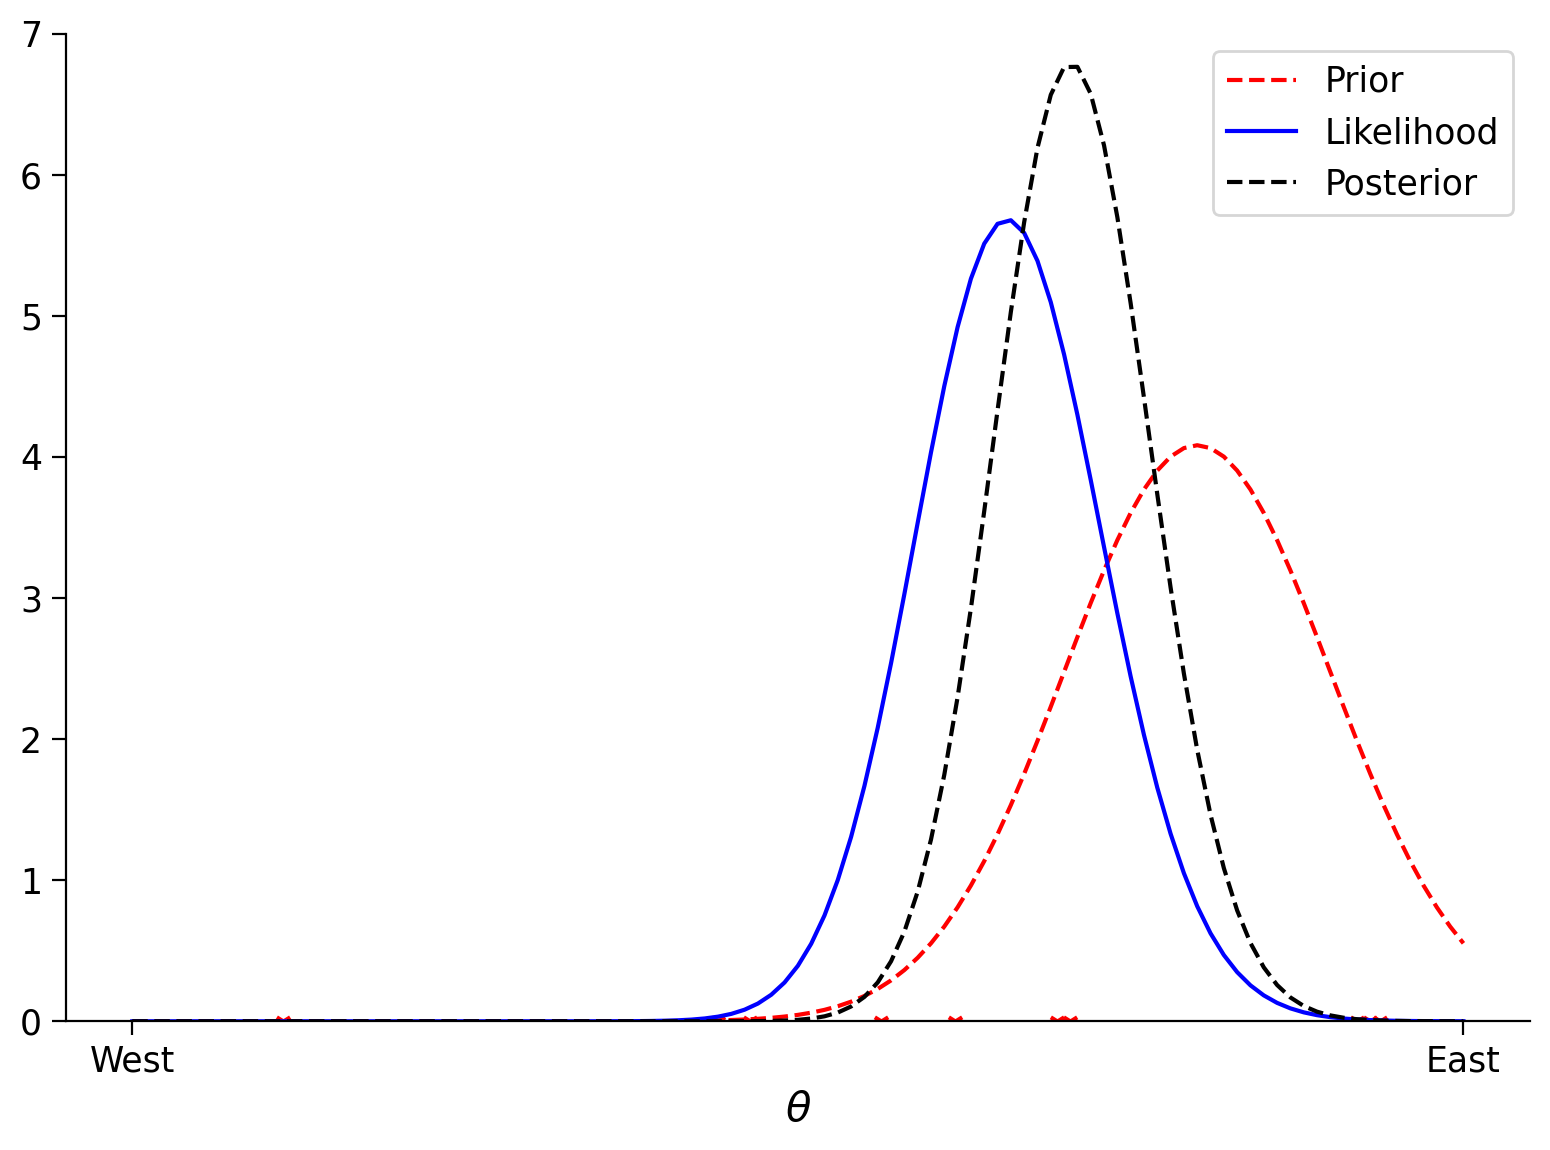

In [5]:
grid = np.linspace(0, 1, num=101)

# Prior probabilities
prior_probs = dnorm_trunc(grid, mean=0.8, sd=0.1)

# Likelihood values
lik_x = compute_lik(dat_x)

# Posterior probabilities
posterior_probs = update_probs(prior_probs, lik_x)

# Plotting
plt.plot(grid, dnorm_trunc(grid, mean=0.8, sd=0.1), linestyle='dashed', color='red', label='Prior')
plt.plot(grid, lik_x, linestyle='solid', color='blue', label='Likelihood')
plt.plot(grid, posterior_probs, linestyle='dashed', color='black', label='Posterior')
plt.scatter(dat_x, np.zeros_like(dat_x), color='red', marker='1')
plt.ylim(0, 7)
plt.xlabel(r'$\theta$')
plt.ylabel('')
plt.xticks([0, 1], ["West", "East"])
plt.legend()
plt.show()

Il grafico illustra le tre distribuzioni coinvolte nell'aggiornamento bayesiano.

1. La curva tratteggiata rossa rappresenta la distribuzione a priori di $\theta$. Questa curva riflette le nostre credenze iniziali o le aspettative riguardo ai possibili valori di $\theta$ prima di effettuare qualsiasi osservazione. Nel nostro esempio, la distribuzione a priori è una distribuzione normale con una media di 0.8 e una deviazione standard di 0.1. Questo implica che, prima di raccogliere dati, prevediamo che il valore di $\theta$ sia prossimo a 0.8, con una limitata variazione intorno a questa media.

2. La curva continua blu rappresenta la verosimiglianza dei dati osservati dato un valore specifico di $\theta$. In altre parole, essa descrive quanto i dati osservati supportano ogni possibile valore di $\theta$. La forma della curva indica quale valore di $\theta$ risulta più plausibile in base a ciò che è stato osservato. Maggiore è l'altezza della curva in un determinato punto, maggiore è il supporto fornito dai dati a quel valore di $\theta$.

3. La curva tratteggiata nera rappresenta la distribuzione a posteriori di $\theta$. Questa curva rappresenta la nostra stima aggiornata di $\theta$ dopo aver incorporato i dati osservati e le credenze iniziali attraverso il calcolo bayesiano. La distribuzione a posteriori combina la distribuzione a priori con la verosimiglianza dei dati, fornendo una stima più precisa e informativa di $\theta$. In sostanza, essa riflette la nostra comprensione aggiornata del valore di $\theta$ più probabile, tenendo conto sia delle informazioni iniziali che dei dati osservati.

   - Il valore di $\theta$ più probabile nella distribuzione a posteriori corrisponde al punto in cui la curva raggiunge l'apice, ovvero il valore di $\theta$ in cui la densità è massima. Questo punto rappresenta la stima del parametro $\theta$ che appare più plausibile alla luce dei dati osservati e delle credenze iniziali.
   - Inoltre, la distribuzione a posteriori fornisce indicazioni sulla nostra incertezza riguardo al valore di $\theta$. Se la distribuzione a posteriori è concentrata attorno a un valore specifico di $\theta$ e presenta un picco netto, ciò suggerisce che siamo più sicuri nella stima di $\theta$ e l'incertezza è ridotta. In altre parole, i dati osservati sono informativi e hanno ridotto l'incertezza sul valore di $\theta$. Invece, se la distribuzione a posteriori è ampia e ha una forma meno definita, implica maggiore incertezza nella stima di $\theta$. Questo può accadere quando i dati osservati sono scarsi o poco informativi, oppure se la distribuzione a priori era ampia, consentendo una vasta gamma di valori di $\theta$. In sintesi, la forma della distribuzione a posteriori riflette quanto i dati raccolti ci abbiano aiutato a restringere le possibili valutazioni di $\theta$.

## Linguaggi di programmazione probabilistici

L'esempio precedente illustra il problema cui la modellazione bayesiana intende rispondere e la soluzione che essa propone per risolverlo. Finora abbiamo illustrato la logica dell'aggiornamento bayesiano, senza ancora entrare nei dettagli computazionali che verranno approfonditi nei prossimi capitoli.

Per ora, è importante sottolineare che l'attuale statistica bayesiana fa un ampio utilizzo di un linguaggio di programmazione probabilistico (*Probabilistic Programming Language*, PPL) implementato su computer per eseguire l'aggiornamento bayesiano. Questo approccio ha rivoluzionato il modo in cui si svolgevano le analisi statistiche bayesiane anche solo pochi decenni fa. L'adozione di tali metodi computazionali ha semplificato la formulazione di modelli statistici complessi, abbassando la soglia delle competenze matematiche e computazionali richieste, e agevolando il processo di modellazione bayesiana. Inoltre, questi strumenti hanno aperto nuove opportunità per affrontare problemi di analisi dei dati che, in passato, sarebbero stati notevolmente complessi da trattare.

## Notazione

Per chiarire la notazione, nel seguito useremo $y$ per rappresentare i dati e $\theta$ per indicare i parametri incogniti di un modello statistico. Entrambi, $y$ e $\theta$, saranno trattati come variabili casuali. Utilizzeremo invece $x$ per denotare le quantità note, come ad esempio i predittori di un modello lineare.

Per rappresentare in modo conciso i modelli probabilistici, adotteremo una notazione particolare. Ad esempio, invece di scrivere $p(\theta) = Beta(1, 1)$, scriveremo semplicemente $\theta \sim Beta(1, 1)$. Il simbolo "$\sim$" viene comunemente letto come "è distribuito come". Possiamo anche interpretarlo nel senso che $\theta$ è un campione casuale estratto dalla distribuzione Beta(1, 1). Allo stesso modo, la verosimiglianza di un modello binomiale sarà scritta come $y \sim \text{Bin}(n, \theta)$.

## La distribuzione a priori

Nell'approccio bayesiano, i parametri della distribuzione di riferimento non sono considerati come costanti incognite, bensì come variabili casuali, e di conseguenza sono descritti attraverso una distribuzione di probabilità a priori. Tale distribuzione a priori conferisce un grado superiore di certezza ai valori dei parametri che appaiono più verosimili in base alle informazioni disponibili. Idealmente, le credenze a priori che guidano questa scelta dovrebbero derivare da motivazioni ben fondate, come i risultati di ricerche precedenti.

Le distribuzioni a priori possono variare in base al grado di certezza con cui impegnano il ricercatore a considerare credibile un particolare intervallo di valori dei parametri. Un caso estremo è rappresentato dalle distribuzioni a priori *non informative*, che indicano una completa mancanza di conoscenza pregressa e assegnano lo stesso livello di credibilità a tutti i valori dei parametri. D'altra parte, le distribuzioni a priori informative possono essere classificate come *debolmente informative* o *fortemente informative*, a seconda di come lo sperimentatore distribuisce la credibilità all'interno dello spazio dei parametri. In situazioni estreme, la credenza a priori può concentrarsi completamente su un singolo valore del parametro.

## La verosimiglianza marginale

La formula completa della distribuzione a posteriori si esprime come segue:

$$
p(\theta \mid y) = \frac{p(y \mid \theta) p(\theta)}{\int_{\Theta}p(y \mid \theta) p(\theta) \,d\theta} \quad \text{per} \quad \theta \in \Theta, 
$$

dove $\Theta$ rappresenta lo spazio dei possibili valori del parametro $\theta$.

Per calcolare $p(\theta \mid y)$, occorre dividere il prodotto tra la distribuzione a priori e la verosimiglianza per una costante di normalizzazione. Questa costante di normalizzazione, chiamata verosimiglianza marginale, viene introdotta per garantire che $p(\theta \mid y)$ abbia un'area unitaria.

Tuttavia, l'integrale al denominatore della formula {eq}`eq-bayes-intro`, noto come *verosimiglianza marginale*, spesso è difficile da risolvere analiticamente. Di conseguenza, l'inferenza bayesiana procede generalmente utilizzando metodi iterativi di ricampionamento, come le Catene di Markov Monte Carlo (MCMC).


## Metodi di stima della distribuzione a posteriori

Esistono due approcci per calcolare la distribuzione a posteriori:

1. *Metodo esatto*: Questo metodo è utilizzabile quando la distribuzione a priori e la verosimiglianza appartengono alla stessa famiglia di distribuzioni, conosciute come *distribuzioni a priori coniugate*. In tal caso, è possibile calcolare in modo analitico la distribuzione a posteriori senza ricorrere ad approssimazioni. Tuttavia, le distribuzioni a priori coniugate sono disponibili solo per alcune combinazioni specifiche di distribuzioni a priori e verosimiglianze.

2. *Metodo approssimato*: Questo approccio viene adottato quando non è possibile applicare il metodo esatto, ad esempio quando le distribuzioni a priori e le verosimiglianze non sono coniugate. Il metodo approssimato comporta l'utilizzo di tecniche computazionalmente intense, come le Catene di Markov Monte Carlo (MCMC), per approssimare la distribuzione a posteriori. Questo metodo è più flessibile, poiché può essere impiegato in qualsiasi scenario, ma richiede maggiori risorse computazionali e potrebbe essere più lento rispetto al metodo esatto.

## Il flusso di lavoro bayesiano

Il processo di aggiornamento bayesiano è spesso descritto come "girare la manovella bayesiana" (*turning the Bayesian Crank*), poiché questo flusso di lavoro è applicabile a diverse situazioni di ricerca. L'analisi bayesiana dei dati può essere strutturata in diverse fasi:

1. **Identificazione e Raccolta dei Dati**: Questa fase coinvolge la raccolta dei dati necessari per rispondere alle domande di ricerca. È consigliabile esaminare i dati per avere un'idea della loro distribuzione e individuare eventuali anomalie o irregolarità nella raccolta.

2. **Scelta del Modello Statistico**: In questa fase, si seleziona un modello statistico appropriato per i dati in relazione alle domande di ricerca. Il modello dovrebbe essere teoricamente ben fondato e includere i parametri rilevanti per le domande di interesse.

3. **Specificazione delle Distribuzioni a Priori**: Si procede alla scelta delle distribuzioni a priori per i parametri del modello. Questo è un processo soggettivo, ma le distribuzioni scelte dovrebbero essere almeno plausibili e basate su considerazioni oggettive.

4. **Calcolo delle Distribuzioni Posteriori**: Si ottengono le distribuzioni posteriori per i parametri del modello. Questo può essere ottenuto mediante approcci analitici o computazionali. È fondamentale verificare che gli algoritmi utilizzati convergano correttamente per garantire risultati affidabili.

5. **Valutazione Predittiva Posteriore**: Questa fase comporta una valutazione dell'aderenza del modello ai dati attraverso previsioni predittive. Si verifica se il modello, con i parametri stimati, è in grado di generare previsioni coerenti con i dati analizzati. Se il modello non si adatta adeguatamente, si può ritornare alla fase 2 per riconsiderare il modello.

6. **Interpretazione dei Risultati**: Nell'ultima fase, si interpretano i risultati alla luce delle domande di ricerca. I risultati vengono analizzati e spiegati nel contesto delle informazioni iniziali e delle considerazioni teoriche.

## Commenti e considerazioni finali 

L'approccio bayesiano ci offre una modalità distintiva per gestire l'incertezza associata ai parametri di interesse, differenziandosi dall'approccio classico tradizionale. In questo contesto, anziché considerare i parametri come incognite fisse, assegniamo loro una distribuzione di probabilità nota come distribuzione a priori, la quale riflette le nostre convinzioni iniziali riguardo al valore effettivo del parametro prima dell'esperimento. Successivamente, attraverso l'applicazione del Teorema di Bayes, aggiorniamo questa distribuzione di probabilità in base ai dati raccolti, ottenendo così la distribuzione a posteriori che rappresenta l'incertezza rimanente dopo l'analisi dei dati.

L'approccio bayesiano ci permette di ingegrare le informazioni iniziali con i dati empirici, generando stime più accurate e informativa del parametro di interesse. Questa metodologia ci guida nella presa di decisioni informate, tenendo in considerazione sia l'incertezza che le nostre conoscenze pregresse. 